In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-apr-2021/sample_submission.csv
/kaggle/input/tabular-playground-series-apr-2021/train.csv
/kaggle/input/tabular-playground-series-apr-2021/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/tabular-playground-series-apr-2021/train.csv")
test_data = pd.read_csv("/kaggle/input/tabular-playground-series-apr-2021/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,100000,3,"Holliday, Daniel",male,19.0,0,0,24745,63.01,NaN,S
1,100001,3,"Nguyen, Lorraine",female,53.0,0,0,13264,5.81,NaN,S
2,100002,1,"Harris, Heather",female,19.0,0,0,25990,38.91,B15315,C
3,100003,2,"Larsen, Eric",male,25.0,0,0,314011,12.93,NaN,S
4,100004,1,"Cleary, Sarah",female,17.0,0,2,26203,26.89,B22515,C


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,96708.000000,100000.000000,100000.000000,99866.00000
mean,49999.500000,0.427740,2.106910,38.355472,0.397690,0.454560,43.92933
std,28867.657797,0.494753,0.837727,18.313556,0.862566,0.950076,69.58882
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.68000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.04000
50%,49999.500000,0.000000,2.000000,39.000000,0.000000,0.000000,24.46000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.50000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.66000


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [6]:
feat_with_null = [col for col in train_data.columns if train_data[col].isnull().sum()>10000]
print(feat_with_null)

['Cabin']


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

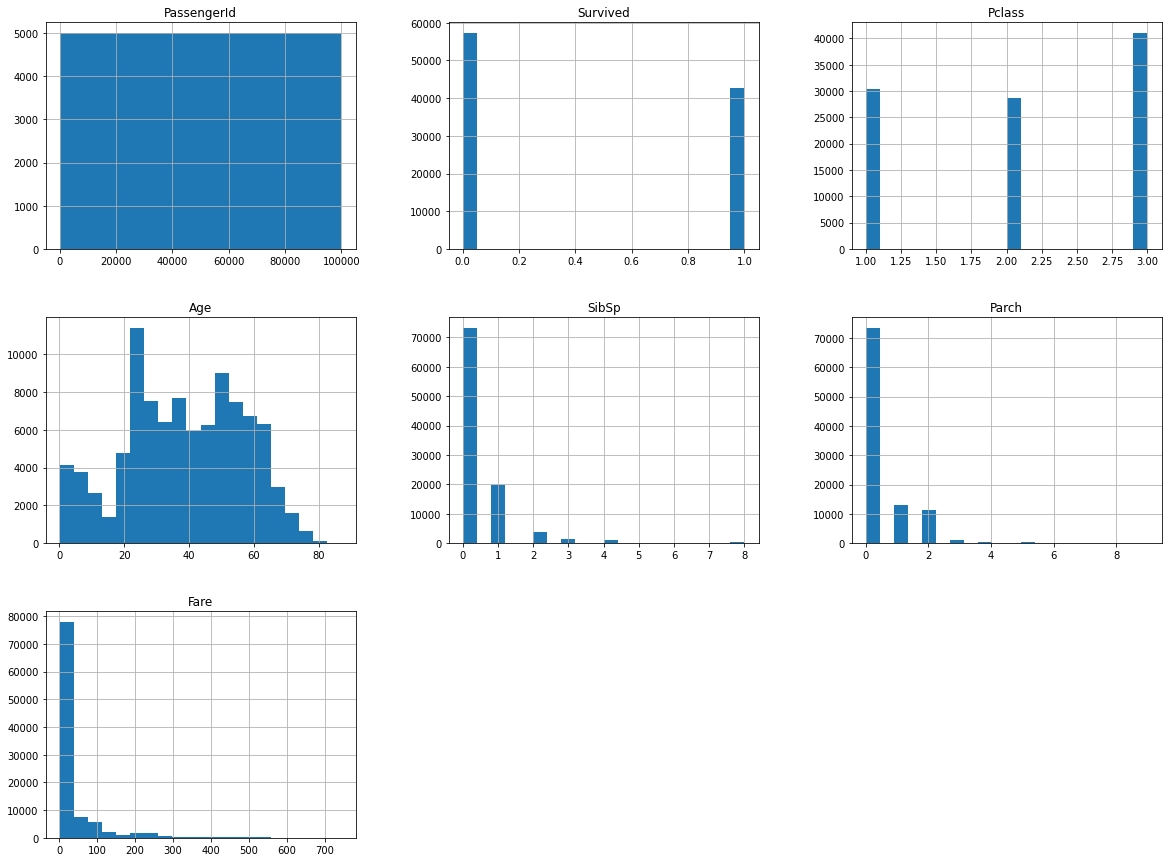

In [8]:
train_data.hist(bins=20,figsize=(20,15))

<AxesSubplot:xlabel='Age', ylabel='Count'>

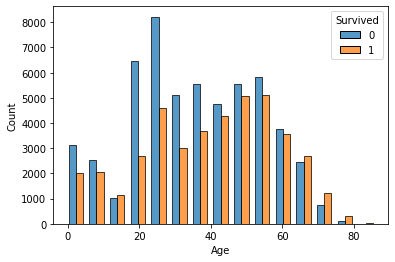

In [9]:
sns.histplot(data=train_data,x='Age',hue='Survived',multiple='dodge',shrink=.7,bins=15)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

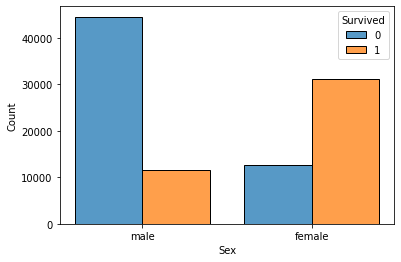

In [10]:
sns.histplot(data=train_data,x='Sex',hue='Survived',multiple='dodge',shrink=.8)

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

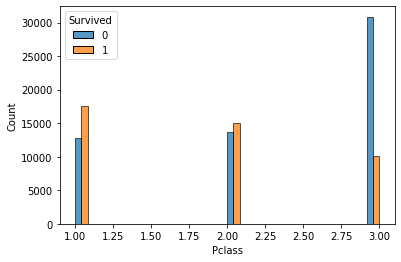

In [11]:
sns.histplot(data=train_data,x='Pclass',hue='Survived',multiple='dodge')

In [12]:
from sklearn.model_selection import train_test_split
target = train_data.Survived
train_data.drop(['Survived','Cabin'],axis=1,inplace=True)
test_data.drop(['Cabin'],axis=1,inplace=True)

too_much_null = [col for col in train_data.columns if train_data[col].isnull().sum()>50000]
train_data.drop(too_much_null,axis=1,inplace=True)
feature_train,feature_valid,label_train,label_valid = train_test_split(train_data,target)
print(feature_train.shape,label_train.shape)

(75000, 10) (75000,)


In [13]:
feature_train.head

<bound method NDFrame.head of        PassengerId  Pclass              Name     Sex   Age  SibSp  Parch  \
19975        19975       1  Stevens, Leonard    male  30.0      0      0   
99890        99890       3   Carnes, Gabriel    male  33.0      1      3   
79004        79004       3  Biderman, Donald    male  57.0      0      0   
63837        63837       3     Silva, Leslie    male  52.0      1      0   
67042        67042       3     Larsen, Harry    male  28.0      0      0   
...            ...     ...               ...     ...   ...    ...    ...   
31008        31008       3     Vesco, Graham    male  22.0      0      0   
42890        42890       1     Cooper, Terry    male  61.0      0      0   
79393        79393       3    Mccord, Robert    male  46.0      0      0   
69596        69596       1    Antonio, Kathy  female  34.0      0      1   
49539        49539       3    Benge, Richard    male  38.0      0      0   

                 Ticket    Fare Embarked  
19975  SOTON/O

In [14]:
from sklearn.preprocessing import OneHotEncoder

object_cols = [col for col in train_data.columns if train_data[col].dtype == 'object']
cat_cols = [col for col in train_data.columns if train_data[col].dtype == 'object' and train_data[col].nunique()<10]

OHE = OneHotEncoder(handle_unknown='ignore',sparse=False)
OHE_train = pd.DataFrame(OHE.fit_transform(feature_train[cat_cols]))
OHE_valid = pd.DataFrame(OHE.transform(feature_valid[cat_cols]))

OHE_train.index = feature_train.index
OHE_valid.index = feature_valid.index

In [15]:
nums_cols = [col for col in train_data.columns if train_data[col].dtype in ['int64','float64']]
print(nums_cols)

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [16]:
print(OHE_train)

         0    1    2    3    4    5
19975  0.0  1.0  0.0  0.0  1.0  0.0
99890  0.0  1.0  0.0  0.0  1.0  0.0
79004  0.0  1.0  0.0  0.0  1.0  0.0
63837  0.0  1.0  0.0  0.0  1.0  0.0
67042  0.0  1.0  0.0  0.0  1.0  0.0
...    ...  ...  ...  ...  ...  ...
31008  0.0  1.0  0.0  0.0  1.0  0.0
42890  0.0  1.0  0.0  1.0  0.0  0.0
79393  0.0  1.0  0.0  0.0  1.0  0.0
69596  1.0  0.0  1.0  0.0  0.0  0.0
49539  0.0  1.0  0.0  0.0  1.0  0.0

[75000 rows x 6 columns]


In [17]:
feature_train_num = feature_train.drop(object_cols,axis=1)
feature_valid_num = feature_valid.drop(object_cols,axis=1)
feature_train_clean = pd.concat([feature_train_num,OHE_train],axis=1)
feature_valid_clean = pd.concat([feature_valid_num,OHE_valid],axis=1)

In [18]:
from xgboost import XGBRegressor
model_1 = XGBRegressor(n_estimators=300,learning_rate=0.05)
model_1.fit(feature_train_clean,label_train)
result = model_1.predict(feature_valid_clean)
print(result)

[0.3042701  0.2330885  0.5116422  ... 0.7880698  0.7442519  0.04307703]


In [19]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(label_valid,result))

0.31628769669526724


In [20]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_transformer = SimpleImputer(strategy='constant')

categorical_transformer = Pipeline(steps=
                                   [('imputer',SimpleImputer(strategy='most_frequent')),
                                                             ('encoder',OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
('num',numerical_transformer,nums_cols),
('categorical',categorical_transformer,cat_cols)])

In [21]:
print(cat_cols,feature_train_clean.columns,test_data.columns)

['Sex', 'Embarked'] Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 0, 1, 2, 3, 4,
       5],
      dtype='object') Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked'],
      dtype='object')


In [22]:
from xgboost import XGBRegressor
model_1 = XGBRegressor(n_estimators=300,learning_rate=0.05)
pipeline_1 = Pipeline(steps=[('preprocessor',preprocessor),
                            ('model',model_1)])
pipeline_1.fit(feature_train,label_train)
result2 = pipeline_1.predict(feature_valid)

In [23]:
results = pipeline_1.predict(test_data)
results.shape

(100000,)

In [24]:
output = test_data.PassengerId.copy()
pred_val = (results>0.5).astype(int)
pred_val = pd.Series(pred_val.tolist(),name='Survived')
#output['Survived'] = pred_val
output = pd.concat([output,pred_val],axis=1)
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")
#output['Survived'] = (results>0.5).astype(int).tolist()

Your submission was successfully saved!
